<h1>D208 - Predictive Modeling (Task 1)</h1>
<h2>By: Jacob Colp</h2>

<h3>A1.</h3>

What features best predict initial admissions day?

<h3>A2.</h3>

The goal of the data analysis is to identify important features in distinguishing the number of days that a patient will spend in the hospital. Being able to identify this will allow the hospital to better strategize staffing, admission and overall patient care. Rather than leaving patients on more acute floors - we may be able to transfer them to long term units in an effort to enhance care for all parties.

<h3>B1.</h3>

Multiple Linear Regression follows the same assumptions as simple linear regression. Those assumptions are as follows (https://www.scribbr.com/statistics/multiple-linear-regression/):

<li>Homogeneity of Variance (Homoscedasticity): This essentially means that the variance of observations is similar among variables. So, if we look at them on a scatter plot - their spread should look pretty similar. There are specific ways to test this, but that is the most simple explanation! (https://blog.minitab.com/en/statistics-and-quality-data-analysis/dont-be-a-victim-of-statistical-hippopotomonstrosesquipedaliophobia)</li>

<li>Independence of Observations (No multicolinearity): So, I think the easiest way to understand this is with an example. And, for ease - lets use the current dataset. One instance that I have observed of multicolinearity exists between initial days and total charge. If you were to blindly evaluate the relationships between all of our variables - you would see their relationship and think "Woah!" But, if we pause for just a second and think, you would also recognize that this makes perfect sense. And, these are really going to explain the same variance within the data. You would expect the price to increase with the number of days

<li>Normality: Data needs to follow a normal distribution</li>

<li>Linearity: The line of best fit through the data points is a straight line, and not curved.</li>


<h3>B2.</h3>

There are several advantages to utilizing the Python programming language in any form of analysis. In this instance - I believe that the largest advantage is the fact that there are several packages available to complete this particular problem. The Python community has done a great job of creating packages that address data problems at different levels. A great explanation of a few popular packages can be found here: https://towardsdatascience.com/3-top-python-packages-to-learn-statistic-for-data-scientist-d753b76e6099. With these packages - a lot of heavy lifting has been done by the developers and it allows you to focus more on the analysis than the algorithm itself. Outside of that - I prefer Python to R for its overall flexibility and support. Python makes the ingestion and exploration of data really easy with Pandas and Numpy. Visualization packages like Seaborn and Matplotlib allow you to visualize different parts of your analysis to gain visual insight. Finally, my preference lies in the Python syntax. I have utilized R a few times, but I have never found the syntax to be as intuitive. I will concede that I learned Python first, and I am sure that is the main cause, but it holds a special place in my heart.

<h3>B3.</h3>

My research question seeks to understand variables that are going to best explain initial admission days. For a hospital - I believe that being able to understand those factor will serve both the patient and hospital better. Doctors will be able to appropriately set expectations with patients and better be able to triage them throughout their stay. I believe that multiple linear regression is the appropriate solution for this question, because it allows us to understand the interplay of multiple variables. It would be naive to assume that any accurate estimation could be made for a patients stay based upon only a single factor. Being able to play around with different variable combinations for solid correlation will allow us to identify those key variables. It will also help to alleviate any impact from confounding variables (Spiegelhalter, 2019). We will better be able to fully evaluate the impact of all variables on our dependent variable.

In [36]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [37]:
med_df = pd.read_csv('medical_clean.csv')

In [38]:
med_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [39]:
#Essentially boiler plate code at this point. I have just copy and pasted this from my D207 project
#This just renames our survey question columns to be less ambiguous

med_df.rename({'Item1':'Survey_Timely_Admission', 'Item2':'Survey_Timely_Treatment', 'Item3':'Survey_Timely_Visits', 'Item4':'Survey_Reliability', 'Item5':'Survey_Options', 'Item6':'Survey_Hours_of_Treatment','Item7':'Survey_Courteous_Staff', 'Item8':'Survey_Evidence_of_Active_Listening'},axis=1, inplace=True)

med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   Interaction                          10000 non-null  object 
 3   UID                                  10000 non-null  object 
 4   City                                 10000 non-null  object 
 5   State                                10000 non-null  object 
 6   County                               10000 non-null  object 
 7   Zip                                  10000 non-null  int64  
 8   Lat                                  10000 non-null  float64
 9   Lng                                  10000 non-null  float64
 10  Population                           10000 non-null  int64  
 11  Area                         

<h3>C1.</h3>

My main data preparation goals will differ somewhat from a real-world project. I benefit from the pre-existing knowledge of a clean and prepared data set (validated above with the info function). This removes the need for any kind of imputation. However, I prefer to convert ordinal sting values to a more clear ordinal numeric value. I will also convert Yes/No columns to binary values. Outside of these steps - I will also split the dataset into a training/test set and scale numeric features. Splitting data into a training and test set will allow us to validate the efficacy of any model. Scaling features will normalize values around a 0 mean. Scaling will help us to minimize the impact of the different scales of measurement that may be found in our data set. I will also be checking for multicollinearity in this step as well. That will help to narrow the feature selection and ensure that we are not overfitting by having variability explained by multiple features. (https://www.kdnuggets.com/2019/07/data-pre-processing-optimizing-regression-model-performance.html)

<h3>C2.</h3>

Specific summary statistics can be found above as output by the describe function. There are 50 columns with 10,000 non-null rows a piece. At initial glance - the most outstanding thing is drastically different scales of data. Populations and Incomes reach into the hundreds or thousands where other features, such as children, will max out around 10. Other interesting behavior can be found in those same feature and offer a sobering reminder of where summary statistics can fail. The max of population is just over 122,000 and the minimum is 0. That places the mean value around 9,000. Without looking at the distribution of data - I can say, with a high level of confidence, that this mean is does not best represent this particular feature. Perhaps a median would be a better singular value to represent central tendency, or maybe this feature's behavior is too complex to be understood by a single metric. I would also like to draw attention to our dependent feature (Initial_Days), because it would appear to have similar behavior. The mean may be representative of our data set, but I would struggle to believe that the average hospital stay is over a month. That in and of itself may be cause for concern in our data collection process. The sample may not be representative of the underlying population. My list of predictor variables will be:

<li>Age</li>
<li>Income</li>
<li>VitD_Levels</li>
<li>Doc_Visits</li>
<li>Soft_Drink</li>
<li>HighBlood</li>
<li>Complication_Risk</li>
<li>Overweight</li>
<li>Stroke</li>

These predictor variables are subject to change based upone further exploration. These are variables that I found initially intriguing for their usability in a clinical setting. Knowing this data set - I may end up utilizing PCA. Over this project and previous - I have not noticed a strong correlation between variables. PCA may help in expanding their usability by combining variables to add a higher level of context to individual observations.

<h3>C3.</h3>

Some of this code is effectively boiler plate code that I have taken from previous projects working with this dataset. The first step that I take is converting the complication risk text column to a column of ordinal values, so a model can imply their relationship. Within that same code block - I convert other Yes/No object columns to binary values. For scaling and utilization within our regression - it is better to be dealing with numeric values. I then scale the dataset utilizing standard scaler. Following that - I break out our dependent variable into its own DF for our eventual split of the training and test sets. I do a brief check to verify that there is not any multicollinearity between our predictor variables and then split out our training and test sets of data. Ultimately - these steps prepare the data for the model. (https://www.kdnuggets.com/2019/07/data-pre-processing-optimizing-regression-model-performance.html)

In [40]:
#Essentially boiler plate code at this point. I have just copy and pasted this from my D207 project
#This encodes categorical variables into numeric values. For our binary - it replaces yes and no with 1 and 0. For complication risk - it encodes High, Medium and Low with ordinal values of 1,2, and 3. I then print out the value counts again to verify its implementation.

med_df.Complication_risk.replace({'High':3,'Medium':2,'Low':1}, inplace=True)

for x in med_df:
    if med_df[x].dtype == 'object':
        med_df[x].replace({'Yes':1,'No':0}, inplace=True)
    else:
        continue

for x in med_df:
    print(med_df[x].value_counts())

1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: CaseOrder, Length: 10000, dtype: int64
C412403    1
D294364    1
B203210    1
C20177     1
K216020    1
          ..
J694995    1
N704840    1
A197688    1
H115454    1
I569847    1
Name: Customer_id, Length: 10000, dtype: int64
8cd49b13-f45a-4b47-a2bd-173ffa932c2f    1
dc1799a6-61d1-44a3-9b94-b89584baddfc    1
dc6bab10-659b-4c78-ba87-87ffa3def32f    1
1cb70cc8-47b7-4192-8bed-faad0f27ab3b    1
06d0da86-5600-472d-a35d-7632775b5cd7    1
                                       ..
2d5c049d-0431-443f-a9d7-46f875998599    1
4ccc7838-5c2c-4a3c-9e3b-2a646cec157e    1
4767cd0e-626d-4c5a-834e-a948aba315c2    1
8b1e1ea3-e596-4a97-b2cb-7f9926e9fbee    1
bc482c02-f8c9-4423-99de-3db5e62a18d5    1
Name: Interaction, Length: 10000, dtype: int64
3a83ddb66e2ae73798bdf1d705dc0932    1
5d85418e862aab28ed18975446153694    1
28970195a839f74e572d2f43bd7fcb71    1
24665d1c5070b579d0c19

In [41]:
#Here I will be scaling the dataset to better account for the broad distribution of different data object. I will do this utilizing the standard scaler function from scikit-learn's preprocessing module.
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#This is me writing a note to myself to ensure that I inverse the transformation to get accurate predictions on the other side of model training.

scaler = preprocessing.StandardScaler()

med_df_scaled = pd.DataFrame(scaler.fit_transform(med_df[['Age', 'Income', 'Initial_days', 'VitD_levels', 'Doc_visits', 'Soft_drink', 'HighBlood', 'Complication_risk', 'Overweight', 'Stroke']]), columns=['Age', 'Income', 'Initial_days', 'VitD_levels', 'Doc_visits', 'Soft_drink', 'HighBlood', 'Complication_risk', 'Overweight', 'Stroke'])

#Here I am splitting out the outcome variable into its own data frame for the eventual training and test sets
Initial_days_df = med_df_scaled.Initial_days
predictor_variables_df = med_df_scaled.drop('Initial_days',axis=1)

predictor_variables_df

,Age,Income,VitD_levels,Doc_visits,Soft_drink,HighBlood,Complication_risk,Overweight,Stroke
0,-0.024795,1.615914,0.583603,0.944647,-0.588898,1.202076,-0.168873,-1.562420,-0.498906
1,-0.121706,0.221443,0.483901,-0.967981,-0.588898,1.202076,1.200737,0.640033,-0.498906
2,-0.024795,-0.915870,0.046227,-0.967981,-0.588898,1.202076,-0.168873,0.640033,-0.498906
3,1.186592,-0.026263,-0.687811,-0.967981,-0.588898,-0.831894,-0.168873,-1.562420,2.004386
4,-1.526914,-1.377325,-0.260366,-0.011667,1.698086,-0.831894,-1.538483,-1.562420,-0.498906
...,...,...,...,...,...,...,...,...,...
9995,-1.381548,0.192047,-0.487525,-0.967981,-0.588898,1.202076,-0.168873,-1.562420,-0.498906
9996,1.622691,-0.894380,0.105476,-0.011667,-0.588898,1.202076,-0.168873,0.640033,-0.498906
9997,-0.412438,0.891569,-0.414049,-0.967981,1.698086,1.202076,1.200737,0.640033,-0.498906
9998,-0.509349,-0.378271,0.964820,-0.011667,-0.588898,-0.831894,-0.168873,0.640033,-0.498906


<AxesSubplot:>

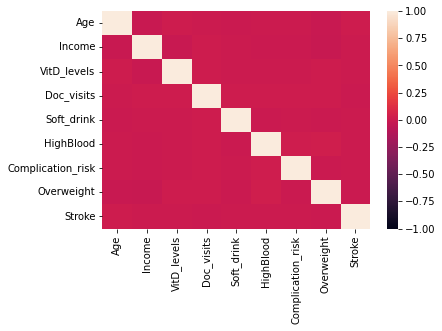

In [42]:
#Here I am generating a heatmap to check for any multicollineartiy. I expand the minimum out to -1 to ensure that we don't have any strong inverse relationships.

sns.heatmap(predictor_variables_df.corr(), vmin=-1.0)

In [43]:
#Here I am splitting out the training and test sets for our predictor and outcome variables
#https://realpython.com/train-test-split-python-data/

X_Train, X_Test, Y_Train, Y_Test = train_test_split(predictor_variables_df, Initial_days_df)

X_Train.reset_index(drop=True)
X_Test.reset_index(drop=True)
Y_Train.reset_index(drop=True)
Y_Test.reset_index(drop=True)

0      -1.255835
1       0.799810
2      -0.963224
3      -1.245777
4       0.928765
          ...   
2495    1.405483
2496    1.136019
2497    0.694280
2498   -1.055098
2499   -0.367178
Name: Initial_days, Length: 2500, dtype: float64

<h3>C4.</h3>

Below - you will find the univariate and bivariate visualizations for the variables that are currently within scope of the model. At an initial glance with the bivariate viz's I am not seeing any strong correlation with out dependent variable. All of these visualizations are derived from a sample from the scaled data set. Again, having used this dataset before - I know that there really isn't a superb relationship between any of our variables (that aren't immediately related i.e. cost and length of stay). (https://seaborn.pydata.org/tutorial/axis_grids.html)

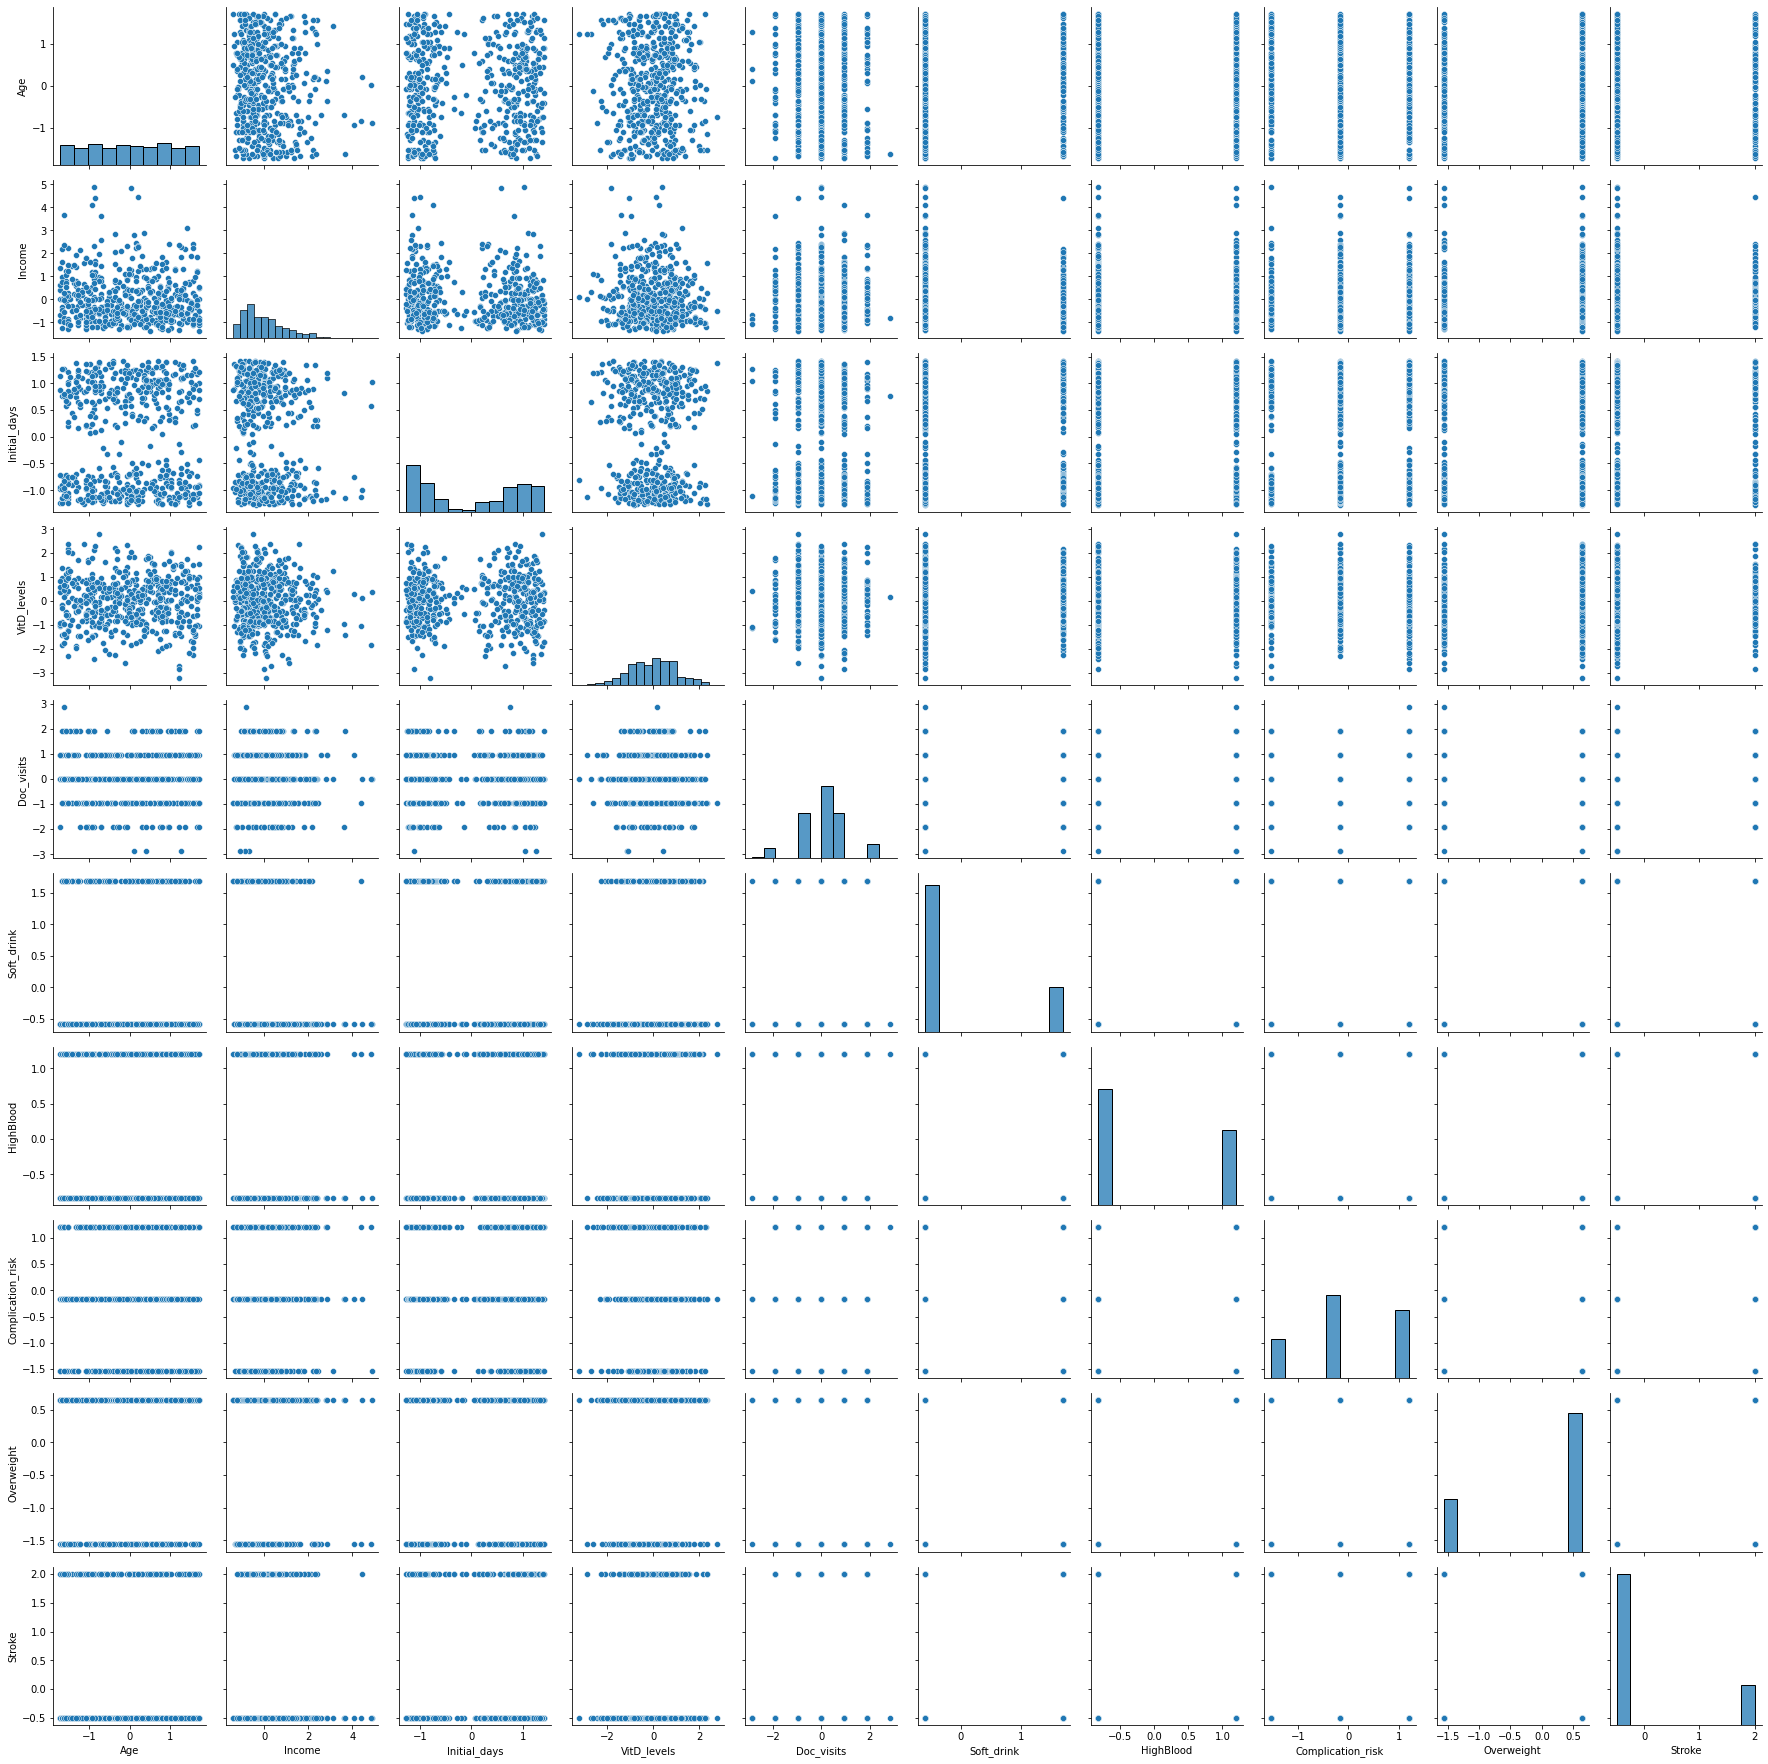

In [44]:
#https://seaborn.pydata.org/tutorial/axis_grids.html
#All Bivariate plots for the cleaned and scaled dataset

g = sns.PairGrid(med_df_scaled.sample(500))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

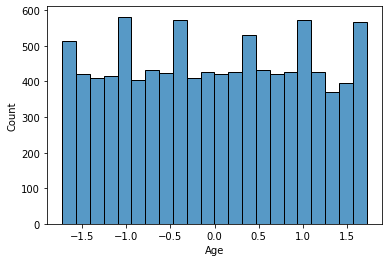

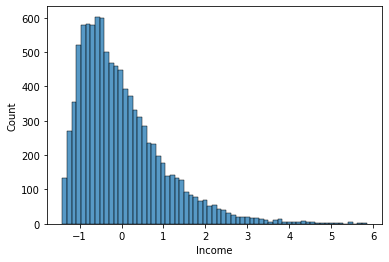

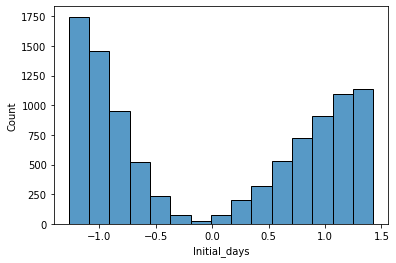

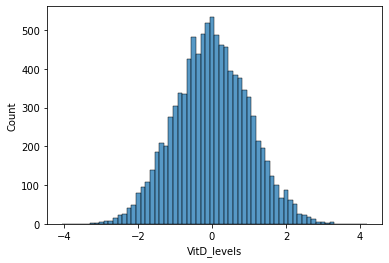

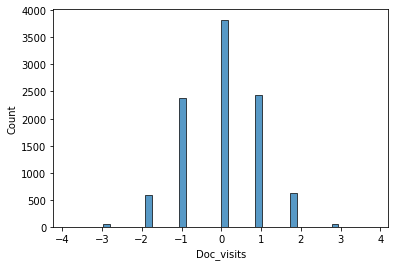

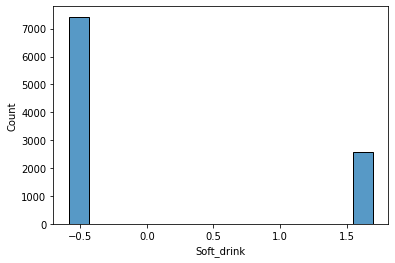

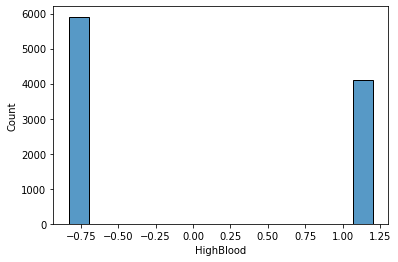

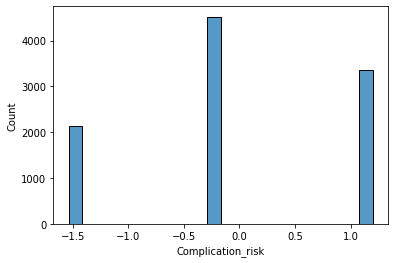

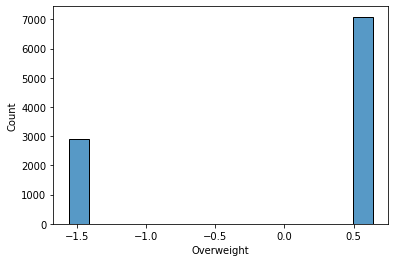

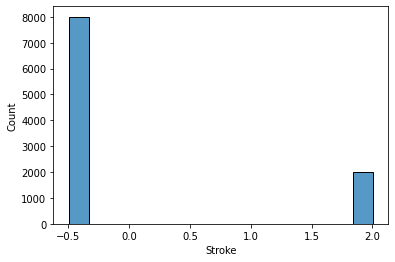

In [45]:
#All univariate plots for cleaned and sclaed dataset

for x in med_df_scaled.columns:
    sns.histplot(x = med_df_scaled[x])
    pyplot.show()

<h3>C5.</h3>

Below is the output code for the cleaned and prepared dataset with the initial variable set.

In [46]:
#Here is the copy of the cleaned and scaled dataset

med_df_scaled.to_csv('D208 - JacobColp - Cleaned Dataset.csv')

<h3>D1.</h3>

Below you will find the initial multiple regression model. There is 4 steps: the first stepis to instantiate our model. Basically - we are just creating the object that our parameters are going to be placed into. That model object is then fit to our training data. Third - we have our model that we are going to make a prediction against. This is going to use the trained model to actually attempt to predict the outcomes (Initial_Days). The final step is to score our predictions. I have output 3 different measures of the efficacy of our model. The first output is an r^2 score. That is going to explain the level of variance in the dependent variable that can be predicted by the independent variables. The closer to 1 that number is - the better. The mean squared error is going to tell us how far off from a set of points that our regression line is. The lower that number - the better. The root mean squared errors then tells us the spread of the mean squared error. Again, the closer the number is to 0 - the better. (https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/) (https://akhilendra.com/evaluation-metrics-regression-mae-mse-rmse-rmsle/)

In [47]:
#https://www.analyticsvidhya.com/blog/2021/05/multiple-linear-regression-using-python-and-scikit-learn/

#Instantiate the model
LR = LinearRegression()

#Fit the model
LR.fit(X_Train, Y_Train)

#Make a prediction on test data
y_prediction = LR.predict(X_Test)

y_prediction

array([-0.057, -0.022, -0.004, ...,  0.049, -0.083,  0.055])

In [48]:
#Scoring our model
score= r2_score(Y_Test, y_prediction)

print('r2 score: ',score)

print('mean_sqrd_error: ', mean_squared_error(Y_Test, y_prediction))

print('root_mean_squared_error: ', np.sqrt(mean_squared_error(Y_Test, y_prediction)))

r2 score:  -0.0021402842929238997
mean_sqrd_error:  1.0054055698662243
root_mean_squared_error:  1.0026991422486728


<h3>D2.</h3>

To start evaluating our first model - lets look through the model evaluation metrics that we utilized above. To start - the r2 score was negative. Not a great start, but also, not the end of the world. The r2 score tells the user how well a combination of variables will explain the variance in a dataset. In this case - our r2 score was negative, which means that the line that our model attempted to fit, accounted for the variance worse than a horizontal line. The other evaluation metrics that we utilized were the mean squared error and root mean squared error. The mean squared error will tell us how wrong we were, and the root mean squared error will tell us how spread out our errors were. Knowing that we were utilizing a scaled dataframe that would max out at no more than 2 or -2, the above errors tell us that we weren't just wrong. We were very wrong. (https://akhilendra.com/evaluation-metrics-regression-mae-mse-rmse-rmsle/)(https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative)

So, lets revisit our variable selection. Perhaps the number of variables actually made our model weaker. To test this we will utilize an sklearn module for feature selection. Within that we will be utilizing the "f_regression" module to score our variables for regression. From there we will select the best 2 or 3 variables (potentially throwing in one if we don't have categorical or continuous), based upon the results from that test. Then we will regenerate our regression model and verify our evaluation metrics - hopefully performing better. By decreasing the number of variables, we are hoping to limit the amount of noise in our model and that will hopefully yield better results. (https://www.datacamp.com/community/tutorials/feature-selection-python)

As a brief note - I have worked with this dataset before and recognize that it's randomly generated. So correlations don't really make sense and are very few and far between. I don't really expect any model to perform well on this data.

In [64]:
#Here we are going to do the feature selection. We will use a simple function from the sklearn library to select our top 3 variables. 
#https://www.datacamp.com/community/tutorials/feature-selection-python
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
#'Age', 'Income', 'Initial_days', 'VitD_levels', 'Doc_visits', 'Soft_drink', 'HighBlood', 'Complication_risk', 'Overweight', 'Stroke'

feature_selection = SelectKBest(score_func=f_regression, k=3)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(predictor_variables_df, Initial_days_df, random_state=29)

feature_fit = feature_selection.fit(X_Train,Y_Train)

np.set_printoptions(precision=3)
scores_df = pd.DataFrame(feature_fit.pvalues_)

columns_df = pd.DataFrame(X_Train.columns)

feature_scores = pd.concat([columns_df, scores_df], axis=1)

feature_scores.columns = ['Columns', 'Scores']

#Here are the three variables that we are going to utilize for our reduced model
print(feature_scores.nlargest(3,'Scores'))

#With these results I would not utilize any of these features. Because none of them have a p-value that would make them statistically significant with a value of less than .05. However, we will continue on with the model since these are
#the best performing features out of our selected columns. It is important to note that results could vary depending on sampling from our train, test, split. I have set a seed value for consistency.


#I am using this so in theory this code could be more dynamic. Were this in production - we could be dynamic and allow the regression model to select the best features upon each run. Just clever code for if seed values aren't utilized.
top_3_columns = feature_scores.nlargest(3,'Scores')

X_Train, X_Test, Y_Train, Y_Test = train_test_split(predictor_variables_df[list(top_3_columns.Columns)], Initial_days_df)

#Instantiate the model
LR = LinearRegression()

#Fit the model
LR.fit(X_Train, Y_Train)

#Make a prediction on test data
y_prediction = LR.predict(X_Test)

y_prediction

#Scoring our model
score= r2_score(Y_Test, y_prediction)

print('r2 score: ',score)

print('mean_sqrd_error: ', mean_squared_error(Y_Test, y_prediction))

print('root_mean_squared_error: ', np.sqrt(mean_squared_error(Y_Test, y_prediction)))

       Columns    Scores
2  VitD_levels  0.868013
3   Doc_visits  0.791916
7   Overweight  0.724608
r2 score:  -0.0011909519316684047
mean_sqrd_error:  1.0047374680633923
root_mean_squared_error:  1.0023659352069942


<h3>D3.</h3>

Above is the code for a reduced model. You can see that this model was almost equally horrible. It remains worse than a horizontal line at explaining the variance in our data. And, our error values remain abismally high. While there was marignal, and I mean marginal, improvement - even the best 3 features out of our initial list seem to do a poor job in our model. We have utilized VitD_levels (continuous), Doc_visits (continuous), and Overweight (categorical) as the three best features based upon our feature selection (which will be discussed more in the next section).

<h3>E1.</h3>

The initial intent of the data analysis process as outlined by the project description includes an initial model and reduced model. So, several independent variables were chosen as a start for a multi-linear regression model. The initial selection was based upon their ease of use and prevelance within a clinical setting. As an additional factor - they intuitively seemed connected to the length of a patient's hospital stay. The first model was implemented and yielded less than ideal results. Utilimately created a linear model that fit the data worse than a horizontal line.

The next step in the process was to run through feature selection in an effort to reduce the number of variables and hopefully yield a model that better fit the data. While it did technically improve - the reduced model yielded only slightly better results and ultimately fell short of surpassing that horizontal line. 

To implement feature selection - I elected to utilize a function of sklearn's feature selection module, called SelectKBest. Effectively, that module will allow you to run various statistical tests, get scoring metrics for several variables, and maintain your best performers. Within that module, I utilized a regression model to score the independent variables. We did not end up identifying any variables within our test set that were able to exceed an alpha value less than .05. In traditional practice, that would eliminate these features from being utilized within a model. Because, the relationship could be happening purely by chance and the odds of that are not exceedingly low. However, in knowing that correlation is almost nonexisitant within the dataset (and certainly not in our chosen variables), we proceeded anyway. I chose to utilize a regression model for scoring since that was the ultimate goal of our output, and we were utilizing a mix of continuous and categorical variables. The regression model was more robust for this versus something like a Chi2 test of independence. (https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

We utilized the same scoring metrics for both the initial model and our reduced model. To restate from previous sections, the r2 score was used to identify how well our model fit the dataset. The squared error metrics were utilized to tell us how far off we were. To summarize, our line fit poorly. The predictions were very far off (for our scaled data - 1 is a large difference) and our predictions were very spread out. (https://akhilendra.com/evaluation-metrics-regression-mae-mse-rmse-rmsle/)

Below you will find the residual plot. Ideally, you would see a lot of values at zero - meaning that there was no difference between the prediction and the actual value. However, that is not the case. Barring a few examples that get close - most of the values are very off in the positive or negative direction. (https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/)

<AxesSubplot:ylabel='Initial_days'>

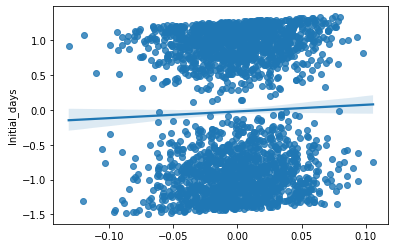

In [79]:
#Here is the residual plot

residuals = y_prediction - Y_Test

sns.regplot(y= residuals, x= y_prediction)

<h3>E2.</h3>

Below I will reiterate and print out results from data analysis process.

In [80]:
print(residuals)

2795    0.992065
8789   -0.537144
9398   -0.979335
1935    0.761182
8105   -1.007733
          ...   
4742    0.811688
9440   -1.178329
3020    1.021632
3030    0.865404
9686   -1.178155
Name: Initial_days, Length: 2500, dtype: float64


In [81]:
print(y_prediction)

[ 0.038  0.03  -0.044 ...  0.024 -0.02  -0.008]
